In [155]:
from environment import Environment
from agent import Agent
from trainer import Q_learning_trainer, One_step_variational_trainer, Final_variational_trainer, KL_Q_learning_trainer
import matplotlib.pyplot as plt
import numpy as np

In [156]:
# Hyperparameters

In [157]:
N = 30000 # Number of episodes
side = 20

In [158]:
# side = 5 --> BETA = 6
# side = 8 --> 

In [159]:
# Agent/Environment initialization

In [160]:
env = Environment.square(initial_state_range=0, side = side)


#agent = Agent(GAMMA = 1)
BETA = 100 #100 # 8 
mult = 1/BETA #0.01 # 0.15
ALPHA_REF = mult * 3e-3 #3e-2 # 8e-3
OBS_LEAK = mult * 1e-1/ env.N_obs # 2e-2 / env.N_obs

agent = Agent.timeAgent(env, GAMMA=1, ALPHA=ALPHA_REF / BETA, BETA=BETA, do_reward = True)
trainer = Final_variational_trainer(agent, OBS_LEAK=OBS_LEAK, final = True, monte_carlo = True, ref_prob='unif')

#agent = Agent(GAMMA = 1)
#agent = Agent(env, GAMMA=1, ALPHA=0.3, BETA=15, do_reward = True)
#agent = Agent.timeAgent(env, GAMMA=1, ALPHA=0.1, BETA=15, do_reward = True)


#trainer = Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True)
#trainer = KL_Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True, final = True)
#trainer = one_step_variational_trainer(agent)
#trainer = Final_variational_trainer(agent, OBS_LEAK=OBS_LEAK, final = True, monte_carlo = True)

{0: {'E': 1, 'S': 20}, 1: {'E': 2, 'W': 0, 'S': 21}, 2: {'E': 3, 'W': 1, 'S': 22}, 3: {'E': 4, 'W': 2, 'S': 23}, 4: {'E': 5, 'W': 3, 'S': 24}, 5: {'E': 6, 'W': 4, 'S': 25}, 6: {'E': 7, 'W': 5, 'S': 26}, 7: {'E': 8, 'W': 6, 'S': 27}, 8: {'E': 9, 'W': 7, 'S': 28}, 9: {'E': 10, 'W': 8, 'S': 29}, 10: {'E': 11, 'W': 9, 'S': 30}, 11: {'E': 12, 'W': 10, 'S': 31}, 12: {'E': 13, 'W': 11, 'S': 32}, 13: {'E': 14, 'W': 12, 'S': 33}, 14: {'E': 15, 'W': 13, 'S': 34}, 15: {'E': 16, 'W': 14, 'S': 35}, 16: {'E': 17, 'W': 15, 'S': 36}, 17: {'E': 18, 'W': 16, 'S': 37}, 18: {'E': 19, 'W': 17, 'S': 38}, 19: {'W': 18, 'S': 39}, 20: {'E': 21, 'S': 40, 'N': 0}, 21: {'E': 22, 'W': 20, 'S': 41, 'N': 1}, 22: {'E': 23, 'W': 21, 'S': 42, 'N': 2}, 23: {'E': 24, 'W': 22, 'S': 43, 'N': 3}, 24: {'E': 25, 'W': 23, 'S': 44, 'N': 4}, 25: {'E': 26, 'W': 24, 'S': 45, 'N': 5}, 26: {'E': 27, 'W': 25, 'S': 46, 'N': 6}, 27: {'E': 28, 'W': 26, 'S': 47, 'N': 7}, 28: {'E': 29, 'W': 27, 'S': 48, 'N': 8}, 29: {'E': 30, 'W': 28, 'S'

In [161]:
if True:
    mem_pi = []
    mem_KL = []
    mem_TD = []
for i in range(N):
    trainer.run_episode()
    past_obs = trainer.trajectory[-2]
    past_action = trainer.action_history[-1]
    obs = trainer.trajectory[-1]
    current_time = env.get_time()
    past_time = current_time - 1
    reward = trainer.reward_history[-1]
    mem_pi += [trainer.agent.softmax(past_time)[past_action]]
    mem_KL += [trainer.KL(past_obs,past_action,obs,done=True)]
    mem_TD += [trainer.TD_err_var(past_obs,past_action,obs,reward,done=True, past_time=past_time, current_time=current_time)]
    if i%1000 ==0:
        #plt.figure(figsize = (4, 4))
        #plt.plot(agent.KL.flatten())
        print(trainer.nb_trials)
        print("Trajectory: ", trainer.trajectory)
        print("past_obs :", past_obs, ", final Q:", trainer.agent.Q_var[past_time])
        print("final policy :", trainer.agent.softmax(past_time))
        print("Final reward: ", reward)
        print("final KL :", trainer.KL(past_obs,past_action,obs,done=True))
        print("final TD error :", trainer.TD_err_var(past_obs,past_action,obs,reward,done=True, past_time=past_time, current_time=current_time))

1
Trajectory:  [0, 20, 21, 1, 2, 22, 42, 41, 21, 20, 21, 22, 21, 20, 20, 20, 40, 20, 40, 41, 42, 43, 42, 43, 23, 24, 23, 3, 3, 2, 22, 42, 22, 42, 41, 42, 62, 42, 62]
past_obs : 42 , final Q: [ 0.00000000e+00 -5.77113605e-05  0.00000000e+00  0.00000000e+00]
final policy : [0.25036018 0.24891947 0.25036018 0.25036018]
Final reward:  0
final KL : 2.5649493574615367
final TD error : 5.771136054288457e-05
1001
Trajectory:  [0, 0, 1, 21, 22, 23, 3, 3, 2, 22, 23, 24, 25, 24, 4, 24, 25, 26, 6, 7, 27, 47, 27, 47, 67, 47, 46, 26, 27, 47, 46, 66, 67, 47, 48, 28, 8, 9, 10]
past_obs : 9 , final Q: [-0.00359439 -0.00375445 -0.00546439 -0.00494837]
final policy : [0.2712282  0.26692129 0.22496851 0.236882  ]
Final reward:  0
final KL : -1.0160083161713018
final TD error : 0.0035943857219706606
2001
Trajectory:  [0, 1, 0, 0, 0, 0, 1, 1, 21, 1, 21, 22, 23, 24, 44, 45, 25, 26, 46, 66, 67, 68, 88, 89, 90, 91, 111, 131, 132, 133, 153, 173, 174, 194, 174, 175, 155, 135, 155]
past_obs : 135 , final Q: [-0.0

21001
Trajectory:  [0, 20, 40, 60, 61, 81, 101, 121, 122, 123, 124, 125, 145, 165, 164, 184, 164, 165, 166, 186, 187, 207, 206, 207, 187, 167, 168, 167, 168, 188, 189, 190, 191, 190, 191, 211, 212, 232, 233]
past_obs : 232 , final Q: [-0.00602275 -0.00768001 -0.02003967 -0.019088  ]
final policy : [0.42297294 0.35837582 0.10412744 0.1145238 ]
Final reward:  0
final KL : 0.7051026368165338
final TD error : 0.006022745647047296
22001
Trajectory:  [0, 0, 1, 2, 3, 23, 24, 4, 5, 25, 45, 65, 85, 86, 85, 65, 66, 67, 66, 46, 47, 48, 68, 67, 68, 88, 87, 88, 68, 69, 70, 90, 110, 130, 150, 170, 150, 149, 150]
past_obs : 149 , final Q: [-0.00708956 -0.00881623 -0.02043736 -0.01903074]
final policy : [0.4153505  0.34948334 0.10932695 0.12583921]
Final reward:  0
final KL : 0.35105742444912824
final TD error : 0.0070895630579714515
23001
Trajectory:  [0, 0, 0, 0, 1, 21, 1, 21, 22, 21, 41, 21, 1, 2, 3, 3, 4, 5, 25, 24, 25, 45, 46, 66, 67, 87, 107, 108, 109, 108, 107, 108, 109, 129, 130, 131, 111, 112

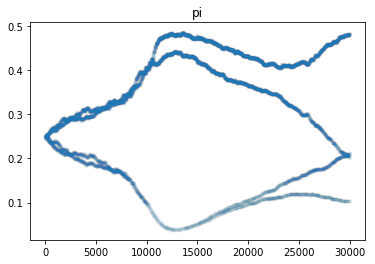

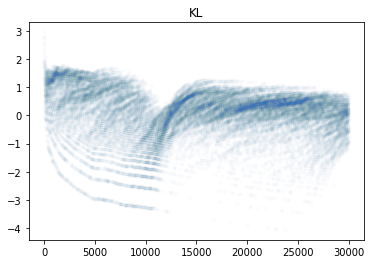

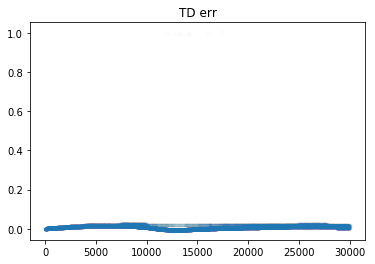

In [162]:
plt.plot(mem_pi,'.', alpha = 0.01)
plt.title('pi')
plt.show()
plt.plot(mem_KL,'.', alpha = 0.01)
plt.title('KL')
plt.show()
plt.plot(mem_TD,'.', alpha = 0.01)
plt.title('TD err')
plt.show()

In [163]:
obs = env.get_observation()
agent.Q_var[0,:]

array([-0.01144998, -0.01547999, -0.01200262, -0.00868303])

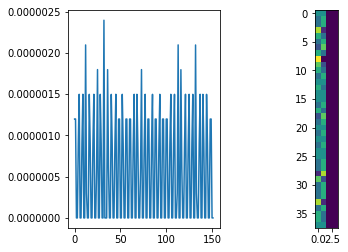

In [164]:
plt.subplot(1,2,1)
plt.plot(agent.Q_ref.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_ref)

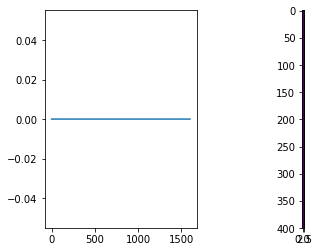

In [165]:
#print('KL', agent.KL)
plt.subplot(1,2,1)
plt.plot(agent.KL.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.KL)

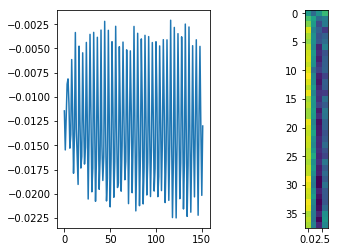

In [166]:
plt.subplot(1,2,1)
plt.plot(agent.Q_var.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_var)

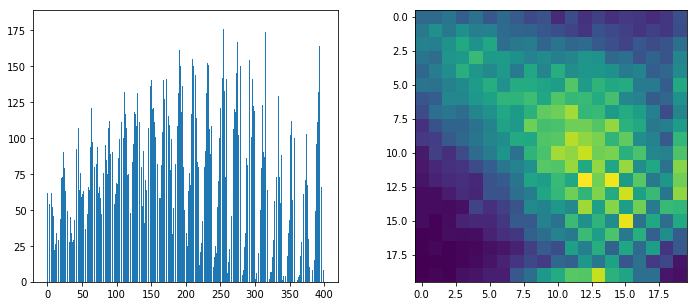

In [167]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits_final)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits_final.reshape(side,side))

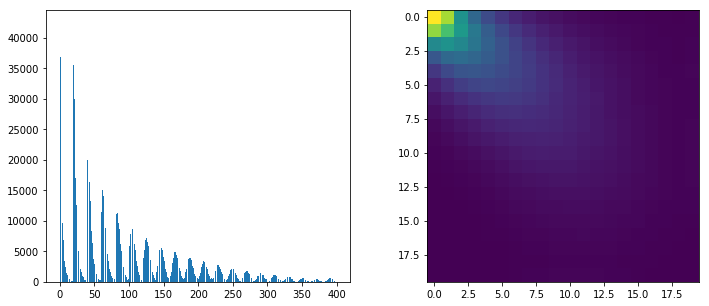

In [168]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits.reshape(side,side))

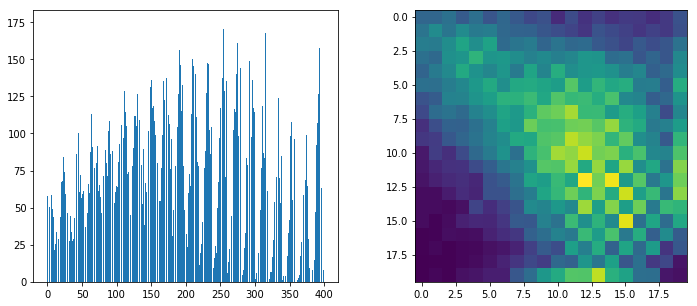

In [169]:
#print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score_final)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score_final.reshape(side,side))

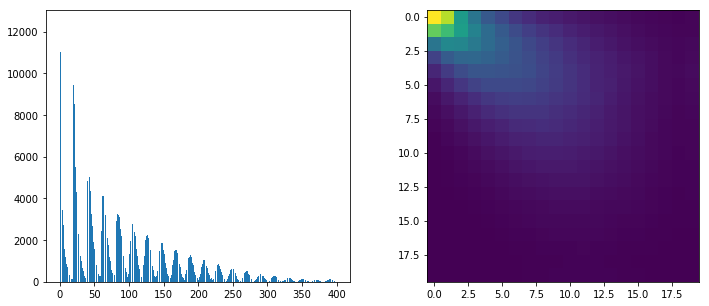

In [170]:
#print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score.reshape(side,side))

KeyError: 3000

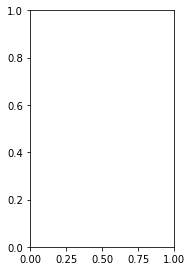

In [171]:
plt.figure(figsize=(15,20))
bsup = 10
for i in range(1, bsup + 1):
    plt.subplot(4,5,i)
    plt.imshow(trainer.mem_V[i * N//bsup].reshape(side,side))

In [ ]:
trainer.mem_V